In [68]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\user\Desktop\Prac ML\Class\Bengaluru_House_Data.csv")

In [69]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [70]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [71]:
#We will drop area_type,availability balcony and society
df.drop(['area_type','availability','balcony','society'],axis=1,inplace=True)

In [72]:
df.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [73]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [74]:
#now we fill in the missing values
df['bath'].value_counts().head(3).index

Float64Index([2.0, 3.0, 4.0], dtype='float64')

In [75]:
#we take the top three values of bath and put it on the missing values randomly
bath=df['bath'].value_counts().head(3).index
bath

Float64Index([2.0, 3.0, 4.0], dtype='float64')

In [76]:
df['bath'].fillna(pd.Series(np.random.choice(bath,size=len(df)),index=df.index),inplace=True)

In [77]:
df['bath'].isna().sum()

0

In [78]:
location=df['location'].mode()

In [79]:
df['location'].fillna(location[0],inplace=True)

In [80]:
df['location'].isna().sum()

0

In [81]:
size=df['size'].mode()

In [82]:
df['size'].fillna(size[0],inplace=True)

In [83]:
df['size'].isna().sum() 

0

In [84]:
df['BHK']=df['size'].str.split().str.get(0).astype(float)

In [85]:
df.drop('size',axis=1,inplace=True)

In [86]:
df

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5.0
13316,Richards Town,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4689,4.0,488.00,4.0


In [87]:
#Hence all the missing values are filled
df.isna().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [88]:
df.dtypes

location       object
total_sqft     object
bath          float64
price         float64
BHK           float64
dtype: object

In [89]:
#since the total_sqft contains some values within a range we convert all range values to a single value
def rangeConverter(x):
    temp=x.split('-')
    if(len(temp)==2):
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

    

In [90]:
df['total_sqft']=df['total_sqft'].apply(rangeConverter)

In [91]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [92]:
#Since most of the location appears less than 10 times we replace it with frequent values
df['location']=df['location'].apply(lambda x:x.strip())
loc_count=df['location'].value_counts()

In [93]:
loc_count_less=loc_count[loc_count<11]
loc_count_less

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [94]:
df['location']=df['location'].apply(lambda x: 'other ' if x in loc_count_less else x)

In [95]:
#We have significantly reduced the number of unique entry for location
#this will help us in getting less no of columns when using get_dummy method
df['location'].value_counts()

other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

#### Now we remove outliers in a dataset

In [96]:
df.describe()

,total_sqft,bath,price,BHK
count,13274.000000,13320.000000,13320.000000,13320.000000
mean,1559.626694,2.693844,112.565627,2.802778
std,1238.405258,1.339100,148.971674,1.294496
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1276.000000,2.000000,72.000000,3.000000
75%,1680.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


In [97]:
df=df[(df['total_sqft']/df['BHK'])>=300]

In [98]:
df.describe()

,total_sqft,bath,price,BHK
count,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.564884,111.382401,2.650838
std,1261.271296,1.079036,152.077329,0.976678
min,300.000000,1.000000,8.440000,1.000000
25%,1116.000000,2.000000,49.000000,2.000000
50%,1300.000000,2.000000,70.000000,3.000000
75%,1700.000000,3.000000,115.000000,3.000000
max,52272.000000,16.000000,3600.000000,16.000000


In [99]:
df['BHK'].describe()

count    12530.000000
mean         2.650838
std          0.976678
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         16.000000
Name: BHK, dtype: float64

In [100]:
#removing outliers 
Q1=df['BHK'].quantile(.25)
Q3=df['BHK'].quantile(.75)
IQR=Q3-Q1
print(IQR,' , ',Q1," , ", Q3)

1.0  ,  2.0  ,  3.0


<Axes: >

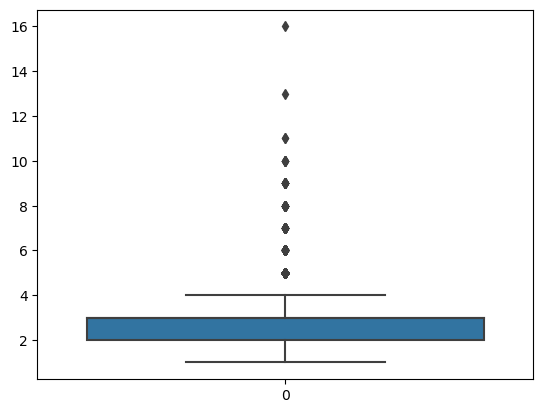

In [101]:
import seaborn as sns
sns.boxplot(df['BHK'])

In [102]:
lower_lmt=IQR*1.5 -Q1
upper_lmt=IQR*1.5 +Q3
print("Lower limit - ",lower_lmt,"Ipper Limit - ",upper_lmt)

Lower limit -  -0.5 Ipper Limit -  4.5


In [103]:
df=df[df['BHK']<=4]

In [104]:
len(df) 

12144

<Axes: >

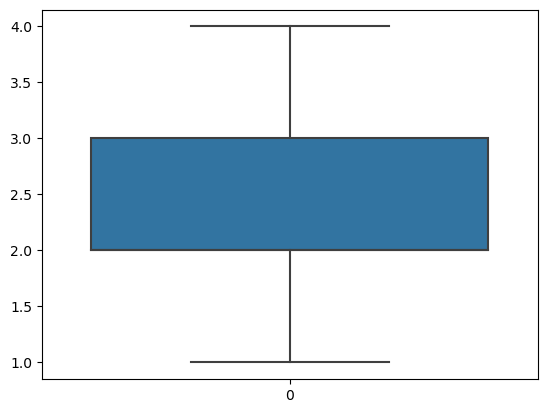

In [105]:
sns.boxplot(df['BHK'])

#### As we can see ,we have significantly reduced the outlier we wont be using the IQR method

<Axes: >

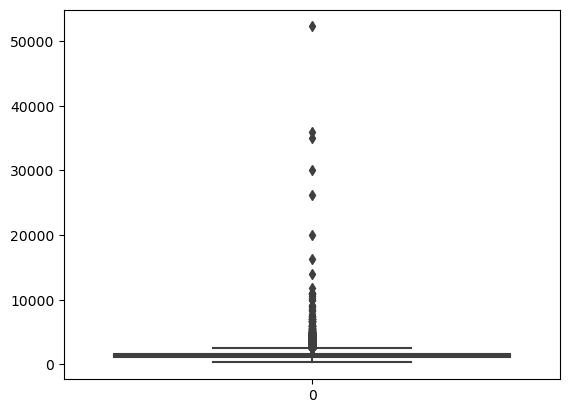

In [106]:
sns.boxplot(df['total_sqft'])

In [107]:
x=df[df['total_sqft']>2050]
len(x)

1621

In [108]:
y=df[df['total_sqft']<500]
len(y)

84

In [109]:
df=df[df['total_sqft']<=2050]

In [110]:
df=df[df['total_sqft']>500]

<Axes: >

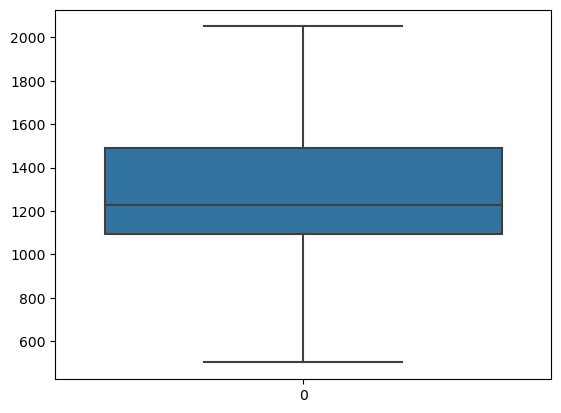

In [111]:
sns.boxplot(df['total_sqft'])

In [112]:
df.shape

(10413, 5)

In [113]:
df['price'].describe()

count    10413.000000
mean        74.196842
std         45.439224
min          8.440000
25%         46.000000
50%         62.800000
75%         88.000000
max       1063.000000
Name: price, dtype: float64

<Axes: >

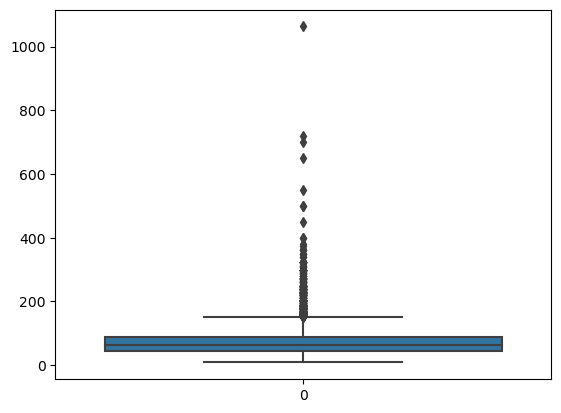

In [114]:
sns.boxplot(df['price'])

In [115]:
x=df[df['price']>130]
len(x)

830

In [116]:
df=df[df['price']<=131]

In [117]:
len(df)

9595

<Axes: >

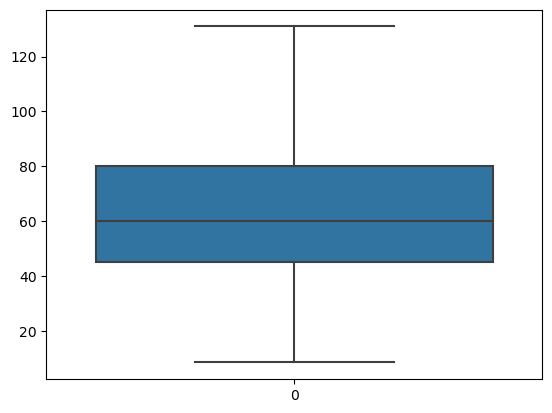

In [118]:
sns.boxplot(df['price'])

In [119]:
df['bath'].describe()

count    9595.000000
mean        2.205419
std         0.578263
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: bath, dtype: float64

<Axes: >

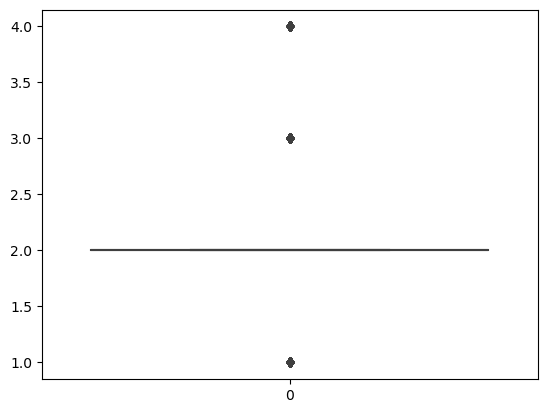

In [125]:
sns.boxplot(df['bath'])

In [126]:
x=df[df['bath']>4]
len(x)

0

In [127]:
df=df[df['bath']<=4]

<Axes: >

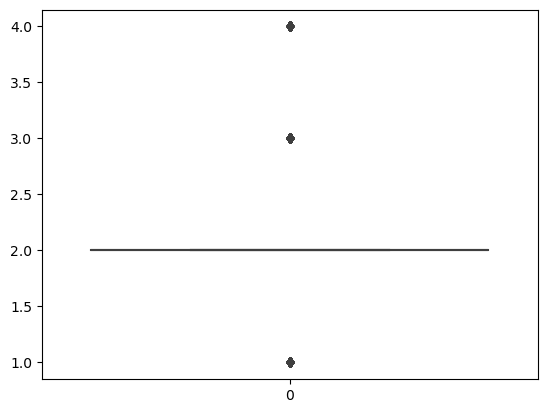

In [128]:
sns.boxplot(df['bath'])

In [124]:
df['bath']

0        2.0
2        2.0
3        3.0
4        2.0
5        2.0
        ... 
13312    2.0
13313    2.0
13314    3.0
13317    2.0
13319    1.0
Name: bath, Length: 9586, dtype: float64

In [129]:
### WE will save this clean data so that we can directly use it from next time
df.to_csv(r"C:\Users\user\Desktop\Prac ML\Class\Bengaluru_Mod_Prj.csv",index=False)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import make_column_transformer


In [136]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\user\Desktop\Prac ML\Class\Bengaluru_Mod_Prj.csv")
#Using get_dummies we convert categorical variables into 0s or 1s
X=df.drop(['price'],axis=1)
y=df['price']

In [137]:
X.head(5)

,location,total_sqft,bath,BHK
0,Electronic City Phase II,1056.0,2.0,2.0
1,Uttarahalli,1440.0,2.0,3.0
2,Lingadheeranahalli,1521.0,3.0,3.0
3,Kothanur,1200.0,2.0,2.0
4,Whitefield,1170.0,2.0,2.0


In [138]:
y 

0        39.07
1        62.00
2        95.00
3        51.00
4        38.00
         ...  
9581     47.00
9582     57.00
9583    112.00
9584     60.00
9585     17.00
Name: price, Length: 9586, dtype: float64

In [145]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [146]:
model=LinearRegression()
sc=StandardScaler()
#Make pipeline
pipe=make_pipeline(column_trans,sc,model)

In [147]:
#visualize pipeline
set_config(display='diagram')


In [148]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [149]:
pipe.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [150]:
y_pred_lr=pipe.predict(X_test)

In [151]:
r2_score(y_test,y_pred_lr)

0.614360557558993

In [153]:
#We getting a score of .59 which is less so we try other algos
from sklearn.linear_model import Lasso
lasso=Lasso()
pipe=make_pipeline(column_trans,sc,lasso)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.5325514355153117

In [154]:
from sklearn.linear_model import Ridge
ridge=Ridge()
pipe=make_pipeline(column_trans,sc,ridge)
pipe.fit(X_train,y_train)
y_pred_lr=pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.6145894222187496

In [155]:
import pickle
pickle.dump(pipe,open(r'RidgeModel.pkl','wb'))